In [1]:
#Note that the "Sentiment" here is different to the "sentiment value/score" in the other notebook. 
#This one does not involve the use of Sentiment Intensity Analyzer and is based on customer ratings.

In [2]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import path
from PIL import Image

In [3]:
#importing the wordcloud library needed for wordcloud generation. 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
#importing the NLTK library 
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
from nltk.corpus import stopwords

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
#reading the csv file containing reviews
df = pd.read_csv("amazon.csv")

In [7]:
#printing out the first 5 rows of the csv file
df.head()

,Unnamed: 0,Star Rating,Review
0,0,4,I cannot comment on the value of this as I go...
1,1,5,"for regular computer and CAD. Works awesome,..."
2,2,2,"This is from every perspective, but on new M..."
3,3,5,This fully featured is a real pleasure to an...
4,4,5,I went from a 60g to this and the difference...


In [7]:
#printing out the last 5 rows of the csv file
df.tail()

,Unnamed: 0,Star Rating,Review
2554,2554,5,The 3 is truly a beautiful ergonomic . It ...
2555,2555,5,Works just as as advertised. I wish it had a ...
2556,2556,5,"Loved the 2s, and managed to make it bette..."
2557,2557,1,Scroll wheel magnetically locked up and broke ...
2558,2558,5,I had the and then the 2 and then this . T...


In [8]:
text = df.Review[0:999]
#text= " ".join(str(review for review in df.Reviews))
print("there are {} words in the combinatiom of all reviews.".format(len(text)))


there are 999 words in the combinatiom of all reviews.


In [9]:
#stopwords = set(STOPWORDS)

In [11]:
#assign values
df.loc[df['Star Rating']<=3, 'Sentiment'] = 0
df.loc[df['Star Rating']>3, 'Sentiment'] = 1

In [12]:
df.head()

,Unnamed: 0,Star Rating,Review,Sentiment
0,0,4,I cannot comment on the value of this as I go...,1.0
1,1,5,"for regular computer and CAD. Works awesome,...",1.0
2,2,2,"This is from every perspective, but on new M...",0.0
3,3,5,This fully featured is a real pleasure to an...,1.0
4,4,5,I went from a 60g to this and the difference...,1.0


In [13]:
#total number of positive and negative scores
df['Sentiment'].value_counts()

1.0    1879
0.0     680
Name: Sentiment, dtype: int64

In [14]:
df_1 = df[df['Sentiment'] == 1.0]
df_1 = df['Review']
df_0 = df[df['Sentiment'] == 0.0]
#df_0.head
len(df_0)
reviews = df['Review']
#print(reviews[0])

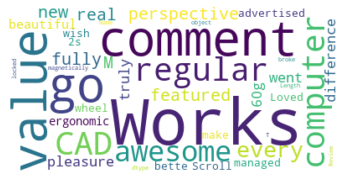

In [15]:
#generating the positive Reviews Wordcloud
wordcloud = WordCloud(background_color="white").generate(str(df_1))
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("positive.png")


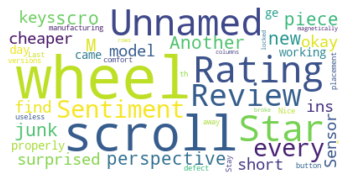

In [16]:
#generating the Negative review wordcloud
wordcloud = WordCloud(max_font_size = 70, background_color="white").generate(str(df_0))
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("negative.png")


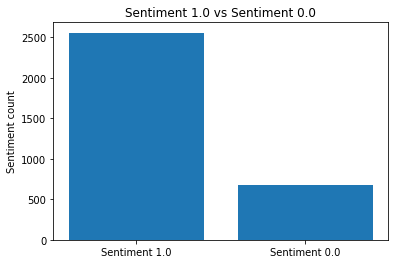

In [31]:
#creating a boxplot comparing the quantity of positive and negative reviews scores
fig, ax = plt.subplots()

X = ['Sentiment 1.0', 'Sentiment 0.0']
counts = [len(df_1), len(df_0)]

ax.bar(X, counts)
ax.set_ylabel('Sentiment count')
ax.set_title('Sentiment 1.0 vs Sentiment 0.0')

plt.show()

In [66]:
#stopword operations
import nltk
import io
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# word_tokenize accepts
# a string as an input, not a file.
stop_words = set(stopwords.words('english'))
file1 = open("amazon.csv")

# Use this to read file content as a stream:
line = file1.read()
words = line.split()
for r in words:
    if not r in stop_words:
        appendFile = open('filteredtext4.txt','a')
        appendFile.write(" "+r)
        appendFile.close()

In [67]:
#creating a function to delete the punctuation marks
def replace_char(string):
    to_replace = "/,!.'“”()’+"
    for tp in to_replace:
        string = string.replace(tp, " ")
        
    return string

In [68]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
word_collection = ""
for r in reviews:
    #print(r)
    #print(".....")
    words = replace_char(str(r)).split()
    for w in words:
        if w not in stop_words:
            word_collection += w.strip() + " "
            
            #print(w, end=", ")
            #appendFile = open('filteredtext4.txt','a')
            #appendFile.write(" " + w.strip())
            #appendFile.close()

In [69]:

#with open("filteredtext4.txt") as f:
    #for line in f:
        #print(line.strip())

In [70]:
word_collection

'I cannot comment value I got Very nice rubbery texture feels nice ergonomics assuming right handed The scroll wheel hyperscrolling allows unlock free spin also automatically free spins spin fast enough though super useful There programmable thumb button though little awkward press Options reprogram buttons either general per application I find worthwhile buggy profiles would bleed would cause delete files etc regular computer CAD Works awesome issues quiet Best I ever Worth $ This every perspective new M1 Mac suggested troubleshooting lags Sometimes point I put away get cheap travel experience better lag Forget gaming writing email sucks cursor lags This fully featured real pleasure best I tried The extra scroll device zoom many things I like better ergonomic fits hand better features worth cost I went 60g difference extremely noticeable It takes effort push around worth extra functions The infinite scrolling side scrolling thumb button base quiet clicks It office sure The DPI setting

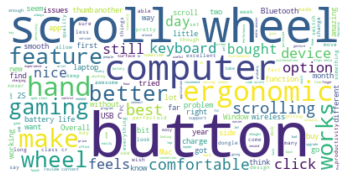

In [73]:
#creating a general wordcloud analyzing all the reviews
wordcloud = WordCloud(background_color="white").generate(str(word_collection.strip()))
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("nplds.png")


In [136]:
#this is an example of using this data (word_collection) to find the frequency of certain word of interest in the reviews.
#here for instance, the word "grip" is mentioned 34 times in the reviews, so not very often
word_collection.count("grip")

34